> # 4 데이터 표현과 특성 공학 

## 4.1 범주형 변수

- 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것 -> '특성 공학'
- 1994년 인구 조사 데이터베이스에서 추출한 미국 성인의 소득 데이터셋(adult) 활용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import os

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
    header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
          'marital-status', 'occupation', 'relationship', 'race', 'gender',
          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
          'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
            'occupation', 'income']]

data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### 4.1.1 원-핫-인코딩(가변수)

- 원-핫-인코딩을 '원-아웃-오브-엔 인코딩' 혹은 '가변수'라고도 함
- 범주형 변수를 0또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것
- 원-핫 인코딩은 통계학에서의 더미 코딩과 비슷하지만 완전히 같지는 않음

#### 범주형 데이터 문자열 확인하기

In [7]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [10]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [11]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
# DataFrame을 Numpy 배열로 추출
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ >50K'].values

In [18]:
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.1.2 숫자로 표현된 범주형 특성

- 저장 공간을 절약하거나 데이터 취합 방식에 따라 범주형 변수가 숫자로 인코딩 된 경우
- 예를들어 adult 데이터셋의 workclass에 대한 대답이 0, 1, 2로 나뉨
- 연속형 변수로 다루면 안됨

In [23]:
# 숫자 특성과 범주형 문자열 특성을 가진 DF
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                       '범주형 특성': ['양말', '여우', '양말', '상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [24]:
# get_dummies를 사용하면 문자열 특성만 인코딩 됨
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [26]:
# 숫자 특성도 가변수로 만들고 싶다면 columns 매개변수에 열을 명시
# 둘 중 한 방법만 사용해도 됨 

# 첫 번째 방법
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df)

# 두 번째 방법
pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 구간 분할, 이산화 그리고 선형 모델, 트리 모델

- 데이터를 잘 표현하는 방법은 어떤 모델을 사용했는지에 따라 다르기도 함
- 폭넓게 사용되고 있는 선형 모델과 트리 기반 모델의 비교
- wave 데이터셋 활용

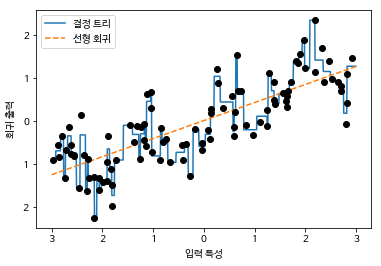

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

#### 연속형 데이터에 강력한 선형 모델을 만드는 방법: 구간 분할(이산화)

In [28]:
bins = np.linspace(-3, 3, 11)
print("구간: {}".format(bins))

구간: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [29]:
# 각 데이터 포인트가 어느 구간에 속하는지 기록
which_bin = np.digitize(X, bins=bins)
print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


데이터 포인트:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


#### 이산적인 특성을 원-핫-인코딩으로 변환

In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

# encoder.fit은 which_bin에 나타난 유일한 값을 찾음
encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [32]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


#### 새로운 선형 회귀 / 결정 트리 모델

Text(0.5, 0, '입력 특성')

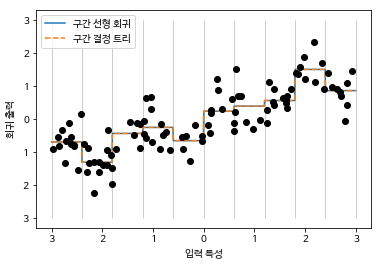

In [33]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

- 선형 회귀 모델과 결정 트리가 정확히 같은 예측을 만들어 냄
- 구간을 나눔으로써 선형 모델은 훨씬 더 유연해지고, 결정 트리는 덜 유연해 짐
- 일부 특성과 출력이 비선형적
- 용량이 크고 고차원 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할은 좋은 방법

## 4.3 상호작용과 다항식

- 특성을 풍부하게 나타내기 위해 원본 데이터에 상호작용과 다항식을 추가할 수 있음
- 통계적 모델링에 자주 사용되는 방식이나, 일반적 머신러닝 애플리케이션에도 많이 적용

#### 각 구간에 기울기도 학습(원본 특성)

In [34]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


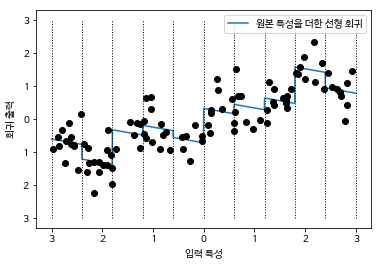

In [35]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')

#### 각 구간에서 다른 기울기를 갖도록(상호작용 특성)

In [38]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


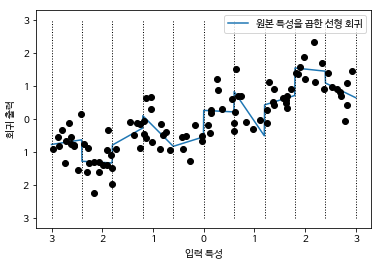

In [39]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

- 이 방식은 preprocessing 모듈의 PolynomialFeatures에 구현

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10까지 고차항을 추가
# 기본값인 "include_bias=True"는 절편을 위한 값이 1인 특성을 추가
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [42]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [45]:
# X와 X_poly의 값 비교
print("X 원소:\n{}".format(X[:3]))
print("X_poly 원소:\n{}".format(X_poly[:3]))

X 원소:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]]
X_poly 원소:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]]


In [46]:
# 각 특성의 차수를 알려주는 get_feature_names으로 특성의 의미 파악
print("항 이름:\n{}".format(poly.get_feature_names()))

항 이름:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


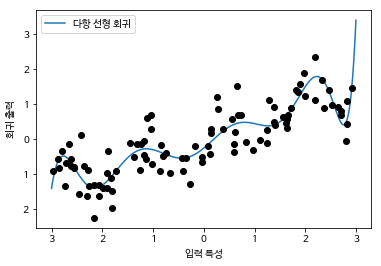

In [47]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc='best')

- 다항식 특성을 선형 모델과 함께 사용하면 다항 회귀 모델이 됨
- 1차원 데이터셋에도 매우 부드러운 곡선을 만듬
- 그러나 데이터가 부족한 영역에서 매우 민감하게 동작

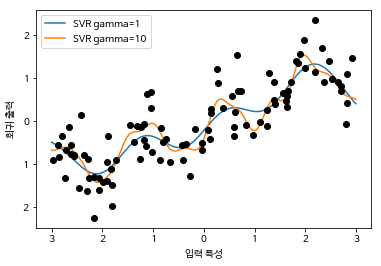

In [48]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

- 더 복잡한 모델인 SVM을 사용해 특성 데이터 변환 없이 다항 회귀와 비슷한 예측을 만듬

#### 보스턴 주택 가격 데이터셋 활용

In [50]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train.poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train.poly.shape: (379, 105)


#### Ridge 성능 비교

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 없을 때 점수: 0.753


#### 랜덤 포레스트 성능 비교

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_poly, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 없을 때 점수: 0.774


- 상호작용과 다항식의 특성은 Ridge의 성능을 크게 높임
- 그러나 랜덤 포레스트는 오히려 성능 저하를 보임

## 4.4 일변량 비선형 변환

- 제곱 항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 됨
- log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용
- log와 exp 함수는 데이터 스케일을 변경해 선형 모델과 신경망의 성능에 도움
- sin과 cos 함수는 주기적인 패턴이 들어 있는 데이터를 다룰 때 편리
- 선형 모델과 신경망은 특성의 스케일과 분포에 밀접한 연관
- 대부분의 모델은 각 특성이 정규분포와 비슷할 때 최고의 성능

#### 실제 데이터 속성과 비슷한 카운트 데이터

In [57]:
# 특성은 모두 정수이고 응답은 실수
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [58]:
print("특성 출현 횟수:\n{}".format(np.bincount(X[:, 0])))

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

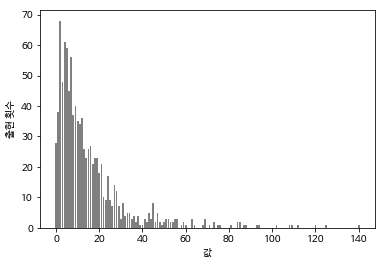

In [59]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

- 선형 모델은 이러한 분포(포아송)를 잘 처리하지 못함

#### Ridge 적용

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


- 비교적 낮은 $R^2$ 점수가 나옴(제대로 된 모델링이 아님)
- 로그 스케일로 변환하면 도움이 됨
- 데이터에 0이 있으면 로그를 적용할 수 없으므로 log(X + 1)을 사용

#### Ridge 적용(log scale)

In [61]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값')

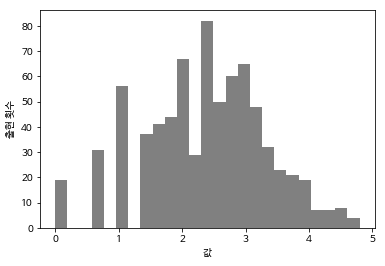

In [62]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [63]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


- 데이터 셋과 모델의 조합에 최적인 변환을 찾기란 어려운 일
- 선형 모델에서는 이런 변환이 필수적
- 가끔은 타깃 변수 y를 변환하는 것이 좋을 수도
- 카운트 데이터는 log(y + 1) 사용이 도움이 됨
- SVM, k-NN, 신경망 같은 모델도 가끔 분할, 상호작용, 다항식 등으로 효과를 봄

## 4.5 특성 자동 선택

- 특성이 추가되면 모델은 더 복잡해지고 과대적합될 가능성이 높아짐
- 가장 유용한 특성만 선택하는 방법 이용 -> 일반화 성능 향상
- 일변량 통계, 모델 기반 선택, 반복적 선택
- 모두 지도 학습 방법

### 4.5.1 일변량 통계

- 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산
- 분산분석(ANOVA)

#### 일부러 노이즈 특성들을 생성

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# 데이터에 노이즈 특성을 추가
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택
# 분산분석의 F-값을 이용
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, '특성 번호')

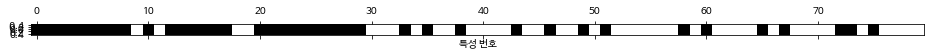

In [5]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

- 선택된 특성은 대부분 원본 특성
- 원본 특성이 완벽하게 복원된 것은 아님

#### 특성 선택 전/후 로지스틱 회귀의 성능 비교

In [6]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- 결과는 때에 따라 다르지만, 많은 특성들이 도움이 안된다고 생각될 때 사용

### 4.5.2 모델 기반 특성 선택

- 머신러닝 모델을 사용하여 특성의 중요도를 평가
- 결정 트리나 선형 모델 계수의 절댓값 등

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

- SelectFromModel은 지도 학습 모델로 계산된 중요도가 지정된 임계치보다 큰 특성들 선택

#### 랜덤 포레스트 분류기로 특성 중요도 계산

In [8]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, '특성 번호')

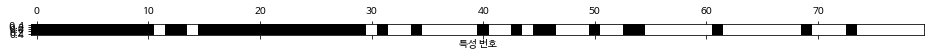

In [10]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [11]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.951


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.5.3 반복적 특성 선택

- 특성의 수가 각기 다른 일련의 모델이 만들어짐
- 특성을 하나도 선택하지 않은 상태로 시작
- 모든 특성을 갖고 종료 조건이 될 때까지 특성을 제거(재귀적 특성 제거)
- 전진선택법, 후진소거법, Stepwise

Text(0.5, 0, '특성 번호')

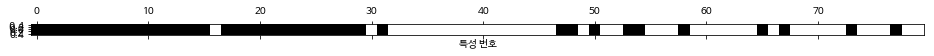

In [18]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
            n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [19]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.951


C:\Users\JH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
# RFE에 사용된 모델을 이용해서도 예측 가능
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


- 특성 선택이 제대로 되면 선형 모델의 성능은 랜덤 포레스트와 견줄만 함
- 실전에서는 대부분 특성 선택이 큰 성능 향상을 끌어내지 못하지만, 여전히 중요한 기술

## 4.6 전문가 지식 활용

- 특성 공학은 전문가의 지식을 사용할 수 있는 중요한 영역

#### 자전거 대여 문제: 특정 날짜와 시간에 자전거를 빌릴 수 있을까?

In [21]:
citibike = mglearn.datasets.load_citibike()

print("시티바이크 데이터:\n{}".format(citibike.head()))

시티바이크 데이터:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

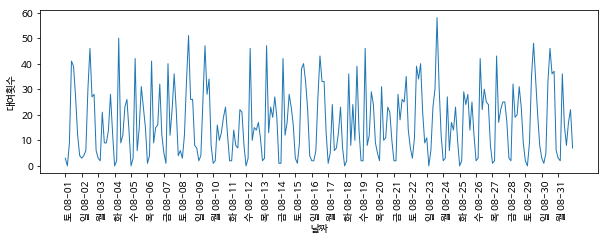

In [23]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ["일", "월", "화", "수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

#### 날짜와 시간을 하나의 숫자로 표현한 특성

In [24]:
# 대여 횟수 추출
y = citibike.values

# POSIX 시간을 10**9로 나누어 변환
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [34]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha='left')
    
    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="테스트 예측")
    
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2: -0.04


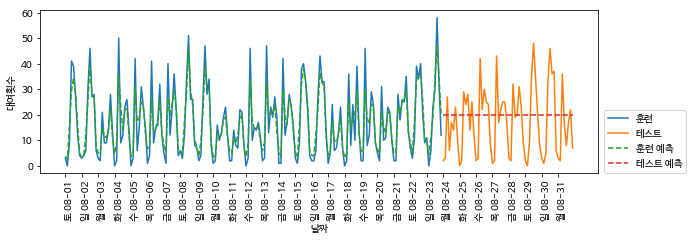

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

- 훈련 세트 예측은 매우 좋으나 테스트 예측은 한가지로만
- 거의 아무것도 학습되지 않았음, 랜덤 포레스트와 특성 사이의 조합 문제
- 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 외삽할 수 있는 능력이 없음

#### 시간과 요일이라는 특성을 추가해보자 ① 시간

테스트 세트 R^2: 0.60


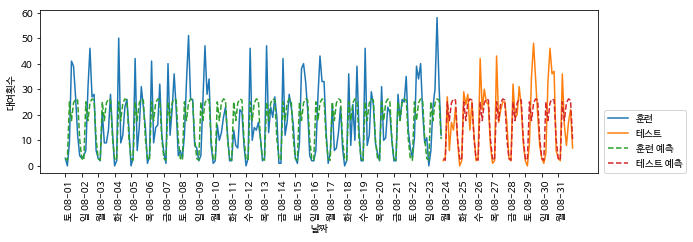

In [38]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

#### 시간과 요일이라는 특성을 추가해보자 ② 요일

테스트 세트 R^2: 0.84


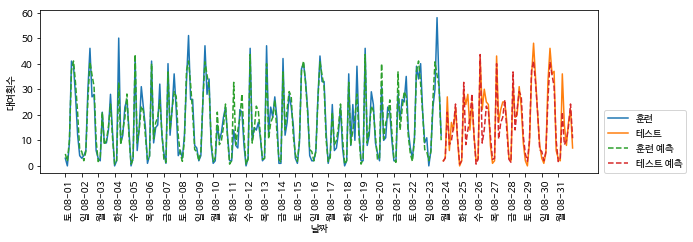

In [39]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                        citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

#### LinearRegression

테스트 세트 R^2: 0.13


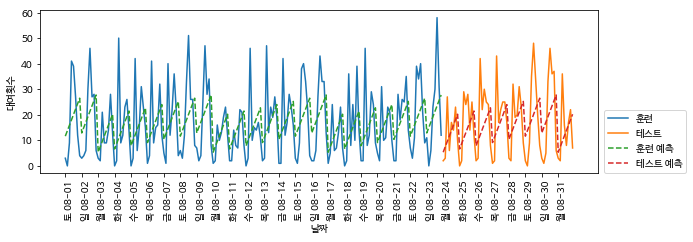

In [40]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

- 요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로 해석됨

#### OneHotEncoder 사용

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


테스트 세트 R^2: 0.62


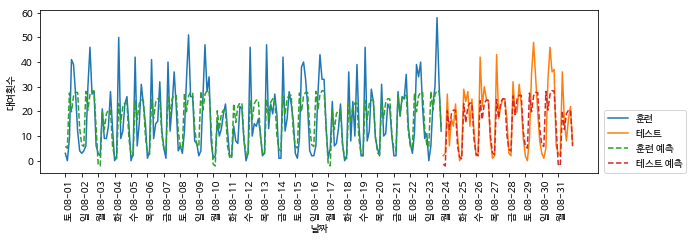

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

#### 시간과 요일의 곱을 특성으로 사용

테스트 세트 R^2: 0.85


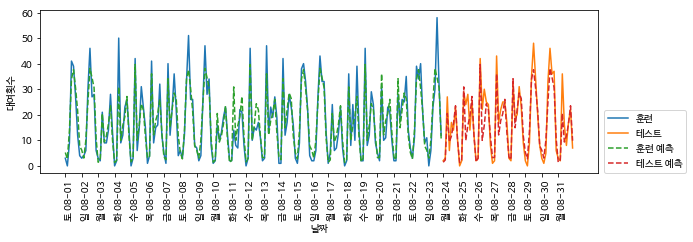

In [50]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                     include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

- 무엇이 학습되었는지 명확하다는 것이 장점

#### 선형 모델의 계수 그래프

In [46]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목" ,"금", "토", "일"]
features = day + hour

In [47]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

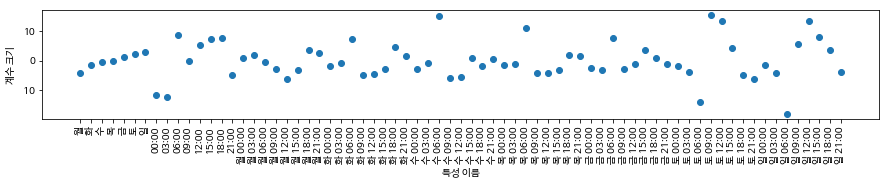

In [48]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

## 4.7 요약 및 정리